# Car Dimensions: A Look Through Time

Have cars of the same model grown larger over the years, or does the change in size depend on the specific model?

To explore this question, we have a dataset in the file `car-dimensions.csv`, which presents the `length`, `width`, and `height` (all in millimeters) for 53 car models. This dataset includes measurements from the earliest generation of each model that we could find, as well as data from the latest model. 

By analyzing this information, we can uncover trends and patterns in the evolution of car dimensions over time.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'car-dimensions.csv'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('car-dimensions.csv')
df.head(4)

,brand_model,length,width,height,year,generation
0,Audi A4,4520,1733,1415,1994,first
1,Audi A4,4762,1847,1427,2015,latest
2,BMW 3 Series,4355,1610,1380,1975,first
3,BMW 3 Series,4829,1827,1442,2018,latest


In [3]:
first_generation = df.query('generation == "first"')
first_generation.head(2)

,brand_model,length,width,height,year,generation
0,Audi A4,4520,1733,1415,1994,first
2,BMW 3 Series,4355,1610,1380,1975,first


In [4]:
latest_generation = df.query('generation == "latest"')
latest_generation.head(2)

,brand_model,length,width,height,year,generation
1,Audi A4,4762,1847,1427,2015,latest
3,BMW 3 Series,4829,1827,1442,2018,latest


In [5]:
# helper function, change gap, vertical alignment, horizontal alignment, placement of gap...
def add_labels(df, x_col, y_col, label_col):
	for i, row in df.iterrows():
		x = row[x_col]
		y = row[y_col]
		gap = "  "
		label = gap + row[label_col]
		plt.text(x, y, label, va='center', ha='left')

### Project Ideas
- Create paired scatter plots of car `width`, `length`, or `height`.

- Follow the Pro Tips.

- Add labels to datapoints to tell a story.

- Create new variables such as:
	- `car footprint = (length * width)`
	- `percent change = (latest - first) / first`
	
- Create horizontal bar plots showing which car models have changed the least or most for a variable of your choice.

Below is a preliminary paired scatter plot of car `length` to get you started. 

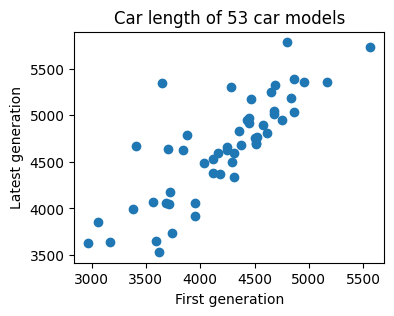

In [6]:
plt.figure(figsize=(4, 3))  
plt.scatter(first_generation['length'], latest_generation['length'])
plt.xlabel('First generation')
plt.ylabel('Latest generation')
plt.title('Car length of 53 car models')
plt.show()

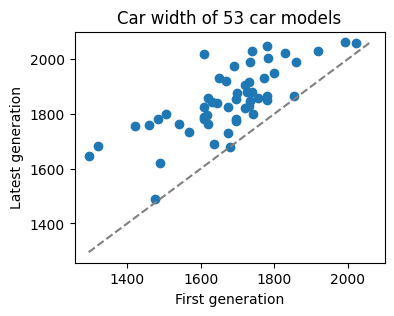

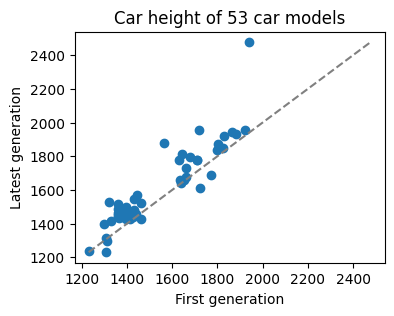

In [11]:
# YOUR CODE HERE (add additional cells as needed)

# Width plot
plt.figure(figsize=(4, 3))
plt.scatter(first_generation['width'], latest_generation['width'])
plt.xlabel('First generation')
plt.ylabel('Latest generation')
plt.title('Car width of 53 car models')
plt.plot([first_generation['width'].min(), latest_generation['width'].max()],
         [first_generation['width'].min(), latest_generation['width'].max()],
         color='gray', linestyle='--')  # 45-degree reference line
plt.show()

# Height plot
plt.figure(figsize=(4, 3))
plt.scatter(first_generation['height'], latest_generation['height'])
plt.xlabel('First generation')
plt.ylabel('Latest generation')
plt.title('Car height of 53 car models')
plt.plot([first_generation['height'].min(), latest_generation['height'].max()],
         [first_generation['height'].min(), latest_generation['height'].max()],
         color='gray', linestyle='--')  # 45-degree reference line
plt.show()


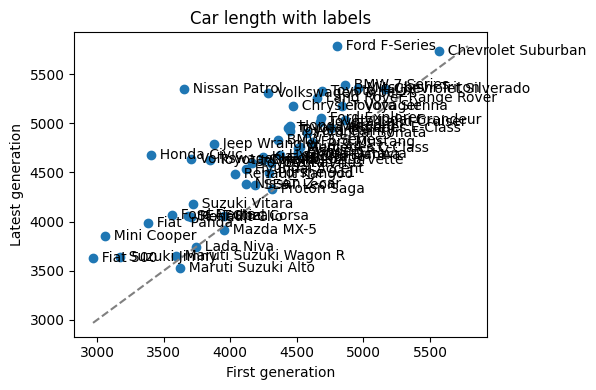

In [17]:
# Filter generations
first_generation = df.query('generation == "first"').copy()
latest_generation = df.query('generation == "latest"').copy()

# Define a label function that uses row values for x, y, and label
def add_labels(df, x_col, y_col, label_col):
    for i, row in df.iterrows():
        x = row[x_col]
        y = row[y_col]
        label = "  " + str(row[label_col])
        plt.text(x, y, label, va='center', ha='left')

# Combine necessary values into one DataFrame for labeling
combined = first_generation.copy()
combined['latest_length'] = latest_generation['length'].values

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(combined['length'], combined['latest_length'])

# Add labels using the combined DataFrame
add_labels(df=combined, x_col='length', y_col='latest_length', label_col='brand_model')

# Axes and styling
plt.xlabel('First generation')
plt.ylabel('Latest generation')
plt.title('Car length with labels')

# Reference diagonal line
min_val = min(combined['length'].min(), combined['latest_length'].min())
max_val = max(combined['length'].max(), combined['latest_length'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--')

plt.tight_layout()
plt.show()

In [9]:
# new variables car footprint
first_generation = first_generation.copy()
latest_generation = latest_generation.copy()

first_generation['footprint'] = first_generation['length'] * first_generation['width']
latest_generation['footprint'] = latest_generation['length'] * latest_generation['width']


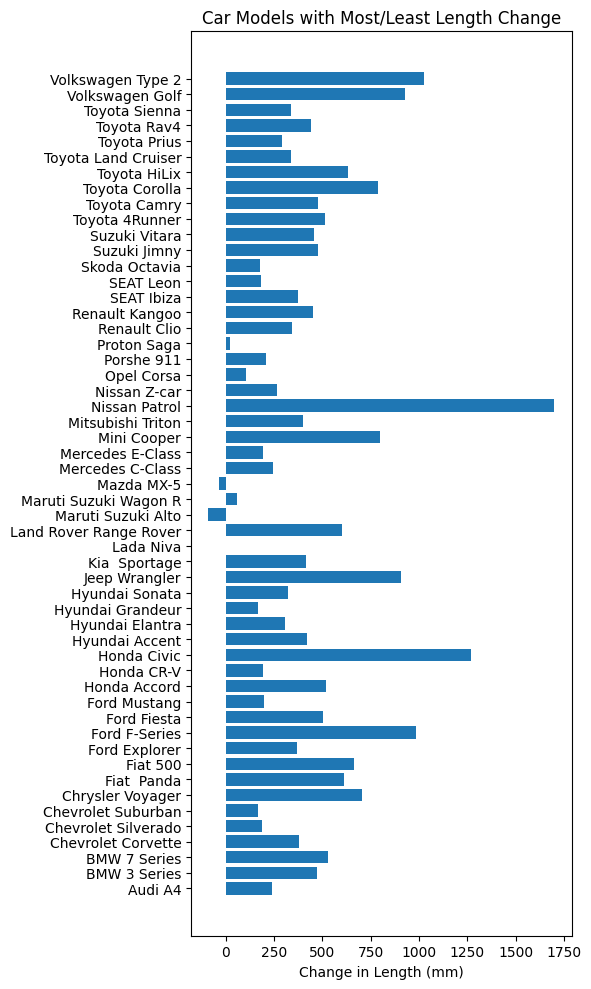

In [10]:
import numpy as np

length_change = latest_generation['length'].values - first_generation['length'].values
brands = first_generation['brand_model']

plt.figure(figsize=(6, 10))
plt.barh(brands, length_change)
plt.xlabel('Change in Length (mm)')
plt.title('Car Models with Most/Least Length Change')
plt.tight_layout()
plt.show()


In [18]:
# Pivot table for easier comparison
pivot_df = df.pivot(index="brand_model", columns="generation", values=["length", "width", "height"])
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]
pivot_df = pivot_df.reset_index()

# Calculate percent changes
pivot_df['length_change_%'] = ((pivot_df['length_latest'] - pivot_df['length_first']) / pivot_df['length_first']) * 100
pivot_df['width_change_%'] = ((pivot_df['width_latest'] - pivot_df['width_first']) / pivot_df['width_first']) * 100
pivot_df['height_change_%'] = ((pivot_df['height_latest'] - pivot_df['height_first']) / pivot_df['height_first']) * 100

# Preview the result
print(pivot_df[['brand_model', 'length_change_%', 'width_change_%', 'height_change_%']])

               brand_model  length_change_%  width_change_%  height_change_%
0                  Audi A4         5.353982        6.578188         0.848057
1             BMW 3 Series        10.884041       13.478261         4.492754
2             BMW 7 Series        10.925926        8.333333         7.972028
3       Chevrolet Corvette         8.966816        9.024253        -5.657492
4      Chevrolet Silverado         3.640589        3.410231         2.659574
5       Chevrolet Suburban         3.018868        1.879327         5.139420
6         Chrysler Voyager        15.734109       10.552214         8.828939
7              Fiat  Panda        18.047337       20.547945         8.650519
8                 Fiat 500        22.289562       27.500000        15.681818
9            Ford Explorer         7.882931       12.394840         3.861908
10           Ford F-Series        20.500000        5.677083         1.875000
11             Ford Fiesta        14.137447       10.721123         9.117647

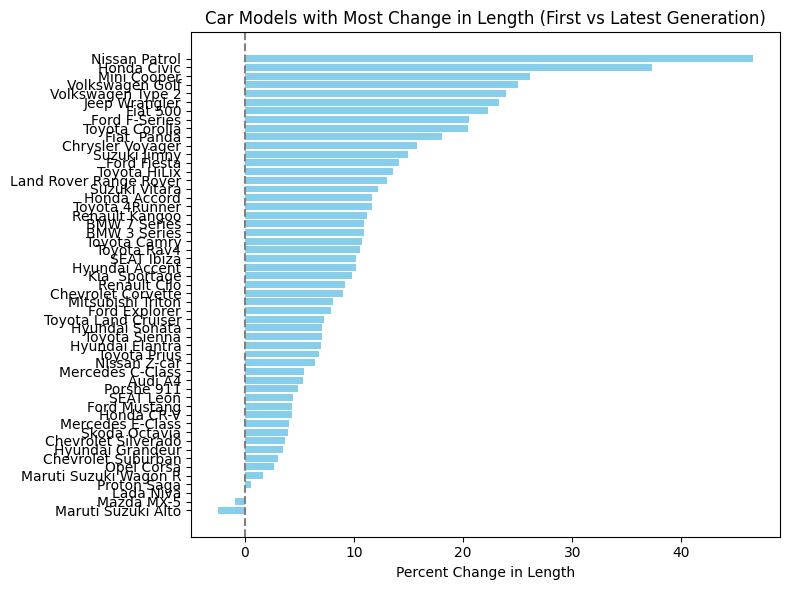

In [19]:
# Calculate percent change in length
pivot_df['length_change_%'] = ((pivot_df['length_latest'] - pivot_df['length_first']) / pivot_df['length_first']) * 100

# Sort by change amount
pivot_df_sorted = pivot_df.sort_values('length_change_%', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(pivot_df_sorted['brand_model'], pivot_df_sorted['length_change_%'], color='skyblue')
plt.xlabel('Percent Change in Length')
plt.title('Car Models with Most Change in Length (First vs Latest Generation)')
plt.axvline(0, color='gray', linestyle='--')  # reference line at 0%
plt.gca().invert_yaxis()  # so highest change is on top
plt.tight_layout()
plt.show()